In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from sklearn.feature_selection import chi2

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix

In [2]:
import pickle

with open('cancerdata.pkl', 'rb') as file:
    cancerdata= pickle.load(file)

# dropped columns based on heatmap
cancerdata.drop(columns=['STDs:AIDS','STDs:cervical condylomatosis','STDs','STDs (number)','Schiller'], inplace=True)

# dropping the categorical columns that show no statistical significance based on chi test
cancerdata.drop(columns=['Smokes','Hormonal Contraceptives','STDs:condylomatosis','STDs:vaginal condylomatosis',
                         'STDs:syphilis','STDs:pelvic inflammatory disease','STDs:genital herpes',
                         'STDs:molluscum contagiosum','STDs:HIV','STDs:Hepatitis B','Dx:CIN',
                         'STDs:vulvo-perineal condylomatosis'], inplace=True)

In [4]:
cancerdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 751 entries, 0 to 857
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              751 non-null    int64  
 1   Number of sexual partners        751 non-null    float64
 2   First sexual intercourse         751 non-null    float64
 3   Num of pregnancies               751 non-null    float64
 4   Smokes (years)                   751 non-null    float64
 5   Smokes (packs/year)              751 non-null    float64
 6   Hormonal Contraceptives (years)  751 non-null    float64
 7   IUD                              751 non-null    float64
 8   IUD (years)                      751 non-null    float64
 9   STDs:HPV                         751 non-null    float64
 10  STDs: Number of diagnosis        751 non-null    int64  
 11  Dx:Cancer                        751 non-null    int64  
 12  Dx:HPV                     

## Training and Scaling

In [5]:
features = cancerdata.drop(columns = ["Dx:Cancer"])
target = cancerdata["Dx:Cancer"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

In [7]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [8]:
X_train_scale = scaler.transform(X_train)

X_test_scale = scaler.transform(X_test)

In [9]:
X_train_scale = pd.DataFrame(X_train_scale, columns = X_train.columns)
X_train_scale.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD,IUD (years),STDs:HPV,STDs: Number of diagnosis,Dx:HPV,Dx,Hinselmann,Citology,Biopsy
0,0.342857,0.074074,0.363636,0.363636,0.0,0.0,0.454545,1.0,0.105263,0.0,0.000000,0.0,0.0,0.0,1.0,1.0
1,0.071429,0.037037,0.227273,0.181818,0.0,0.0,0.045455,0.0,0.000000,0.0,0.666667,0.0,0.0,0.0,0.0,0.0
2,0.171429,0.074074,0.318182,0.272727,0.0,0.0,0.011364,0.0,0.000000,0.0,0.333333,0.0,0.0,0.0,0.0,0.0
3,0.442857,0.148148,0.227273,0.636364,0.0,0.0,0.030000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.042857,0.037037,0.227273,0.181818,0.0,0.0,0.000000,0.0,0.000000,0.0,0.333333,0.0,0.0,0.0,0.0,0.0


## KNN Modeling

In [10]:
knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train_scale, y_train)

knn.score(X_test_scale, y_test)

C:\Users\NessaJay\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.9801324503311258

In [11]:
pred = knn.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [12]:
print(f"Precision:",{precision_score(y_test, pred,zero_division=0)})
print(f"Accuracy:",{accuracy_score(y_test, pred)})
print(f"Recall:",{recall_score(y_test, pred)})
print(f"F1:",{f1_score(y_test, pred)})

Precision: {0.0}
Accuracy: {0.9602649006622517}
Recall: {0.0}
F1: {0.0}


## Feature Selection

### Heat Map

In [ ]:
# loaded original data set to make heatmap
cancer_data = pd.read_csv('risk_factors_cervical_cancer.csv')
cancer_data = cancer_data.dropna()
cancer_data = cancer_data.replace('?', np.nan)
cancer_data.isna().sum()

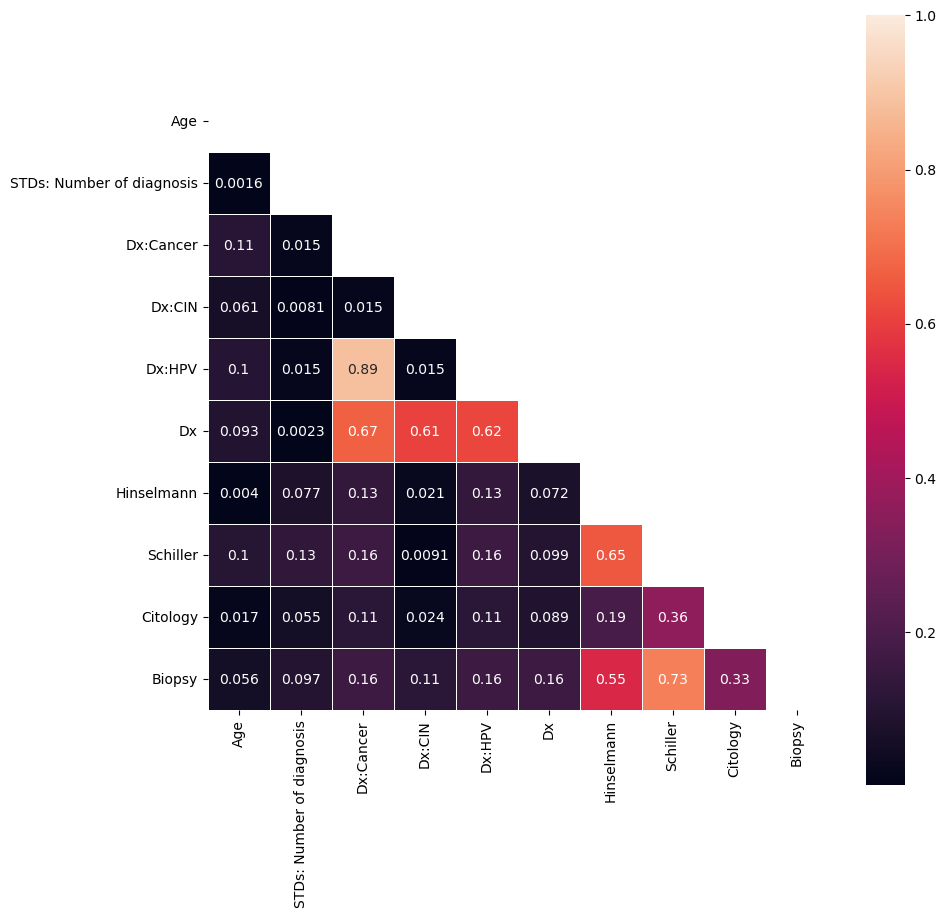

In [14]:
#heat map for numericals

cancer_numericals = cancer_data.select_dtypes(include = np.number)

#absolute value of all correlations
corr=np.abs(cancer_numericals.corr()) 

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10,10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths= .5, cbar_kws={"shrink": 1},annot = corr)

plt.show()

### chi-squared test

In [15]:
#chi-squared test for categorical

chi2_scores, p_values = chi2(features, target)

# Create a DataFrame to display the results
chi2_results = pd.DataFrame({
    'Feature': features.columns,
    'Chi2 Score': chi2_scores,
    'p-value': p_values
})

round(chi2_results,4)

,Feature,Chi2 Score,p-value
0,Age,24.1835,0.0000
1,Number of sexual partners,0.4404,0.5069
2,First sexual intercourse,1.5155,0.2183
3,Num of pregnancies,0.6756,0.4111
4,Smokes (years),32.0429,0.0000
5,Smokes (packs/year),103.4305,0.0000
6,Hormonal Contraceptives (years),15.0112,0.0001
7,IUD,8.2843,0.0040
8,IUD (years),53.5329,0.0000
9,STDs:HPV,81.4444,0.0000


Null Hypothesis: There is not statistically significant relationship with target

Notable results from original chi-test
- Smokes	0.1273	0.7212  (No)
- Hormonal Contraceptives	0.1793	0.6720 (No)
- STDs:condylomatosis	1.0805	0.2986 (No)
- STDs:vaginal condylomatosis	0.0982	0.7540 (no)
- STDs:vulvo-perineal condylomatosis	1.0559	0.3041 (no)
- STDs:syphilis	0.4420	0.5061 (No)
- STDs:pelvic inflammatory disease	0.0246	0.8755 (no)
- STDs:genital herpes	0.0246	0.8755 (no)
- STDs:molluscum contagiosum	0.0246	0.8755 (no)
- STDs:HIV	0.4420	0.5061 (no)
- STDs:Hepatitis B	0.0246	0.8755 (no)
- STDs:HPV	81.4444	0.0000  (Yes)
- Dx:CIN	0.1965	0.6576 (no)
- Dx:HPV	575.6104	0.0000 (yes)
- Dx	336.1541	0.0000  (Yes)
- Hinselmann	12.2044	0.0005  (yes)
- Citology	9.4920	0.0021 (yes)
- Biopsy	18.0424	0.0000 (yes)
- IUD	8.2843	0.0040 (yes)